In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
dataset= pd.read_csv('C:/renewal.csv', usecols=["Age", "Gender","PIN","city_name","Renewed"])
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})

In [120]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
dataset['city_name'] = lab.fit_transform(dataset['city_name'])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

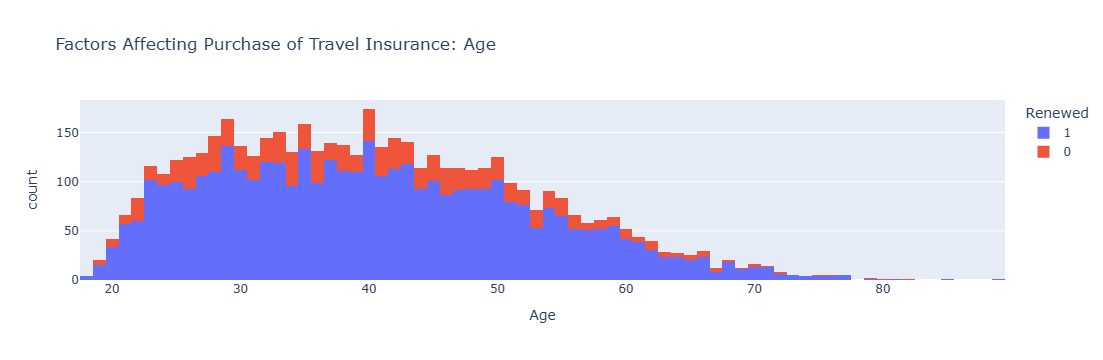

In [124]:
import plotly.express as px
data = dataset
figure = px.histogram(data, x = "Age", 
                      color = "Renewed", 
                      title= "Factors Affecting Purchase of Travel Insurance: Age")
figure.show()

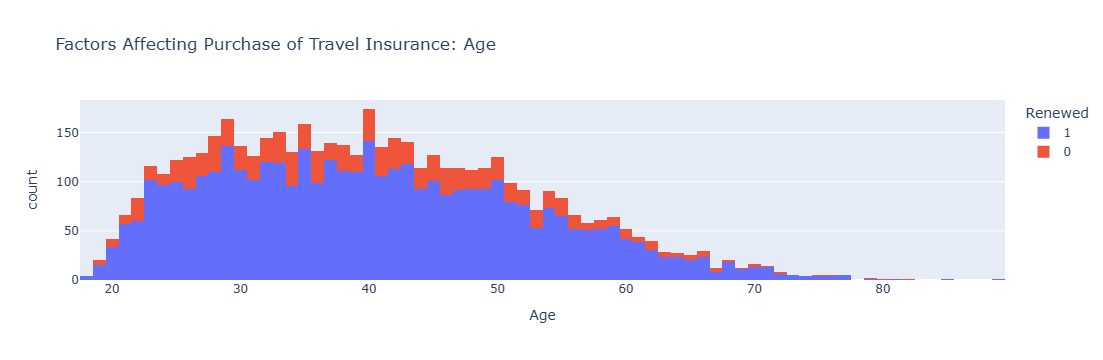

In [126]:
import plotly.express as px
data = dataset
figure = px.histogram(data, x = "Age", 
                      color = "Renewed", 
                      title= "Factors Affecting Purchase of Travel Insurance: Age")
figure.show()

In [128]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [130]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0 253]
 [  0 989]]


0.7962962962962963

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on your training data
scaler.fit(X_train)
# Then transform your data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
print(classifier.predict(scaler.transform([[42,1,512,121002]])))

[1]


In [138]:
# USING RANDOM FOREST FOR PREDICTION
from sklearn.tree import DecisionTreeClassifier

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.25, random_state = 42)
model = DecisionTreeClassifier()
model.fit(X_train1, y_train1)
predictions = model.predict(X_test1)
#print(predictions)
print(model.predict(scaler.transform([[42,1,512,121002]])))

[1]


In [140]:
y_pred_randomForest = classifier.predict(X_test1)
print(np.concatenate((y_pred_randomForest.reshape(len(y_pred_randomForest),1), y_test1.reshape(len(y_pred_randomForest),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred_randomForest)
print(cm)
accuracy_score(y_test1, y_pred_randomForest)

[[  0 253]
 [  0 989]]


0.7962962962962963